In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

 
  - Now, modify your code to use any arbitrary table-based EOS. Specifically, make your solver compatible with the EOS available on stellarcollapse.org. There is example code on that site in C++ and Fortran for reading and using the tables there, and working with the EOS tables is trivial in Python using h5py.
 

  - Determine the maximum mass for any five of the EOS available on stellarcollapse.org.

# Calculate final values for all five tables

h5_files/Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5
h5_files/HShen_HyperonEOS_rho220_temp180_ye65_version_1.1_20131007.h5


IndexError: index 0 is out of bounds for axis 0 with size 0

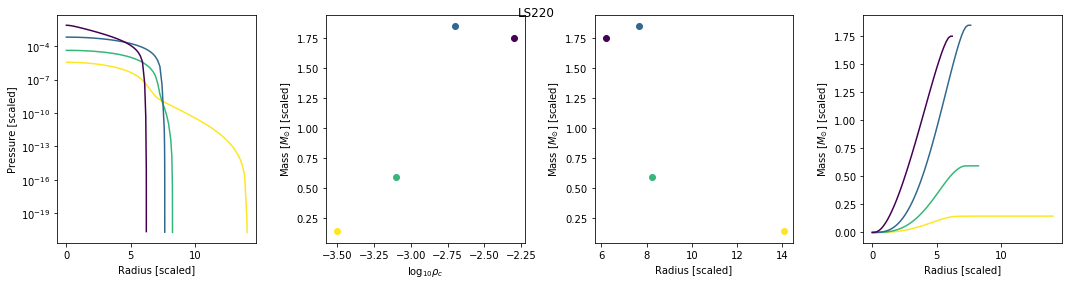

In [11]:
fvals = []
filenames = ['Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5.dat',
             'Hempel_SFHxEOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
             'Hempel_TM1EOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
             'Hempel_TMAEOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
             'LS220_3335_rho391_temp163_ye66.h5.dat']
filenames = ["Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5",
             "HShen_HyperonEOS_rho220_temp180_ye65_version_1.1_20131007.h5",
]

short_names = ['LS220','SFHo','SFHx','TM1','TMA']
rho_values = np.linspace(-3.5, -2.3, 4)

for fname, sname in zip(filenames, short_names):
    print('h5_files/' + fname)
    test = TableStar('h5_files/' + fname)
    
    # this line runs everything
    res = run_star(test, rho_values = rho_values)
    fvals.append(res)
    
    fig = plt.gcf()
    fig.suptitle(sname)

In [ ]:
fvals = []
filenames = ['Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5.dat',
             'Hempel_SFHxEOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
             'Hempel_TM1EOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
             'Hempel_TMAEOS_rho234_temp180_ye60_version_1.1_20120817.h5.dat',
             'LS220_3335_rho391_temp163_ye66.h5.dat']
short_names = ['LS220','SFHo','SFHx','TM1','TMA']
rho_values = np.linspace(-3.5, -2.3, 4)

for fname, sname in zip(filenames, short_names):
    print('eos_dat/' + fname)
    test = TableStar('eos_dat/' + fname)
    
    # this line runs everything
    res = run_star(test, rho_values = rho_values)
    fvals.append(res)
    
    fig = plt.gcf()
    fig.suptitle(sname)
    fig.tight_layout()

In [ ]:
fig, [ax1,ax2] = plt.subplots(2, figsize = [6,6])
for i, (final_values, sname) in enumerate(zip(fvals, short_names)):
    rho, r_values, m_values, P_values, phi_values, M0_values = np.array(final_values).T
    to_km = 1e-5/6.7706e-6

    c = 'C{}'.format(i)
    ax1.plot(to_km*r_values, m_values, '-', color = c, label = sname + ' grav')
    
    i_max = np.argmax(m_values)
    # assert (i_max == np.argmax(M0_values))
    
    m_max = m_values[i_max]
    M0_max = M0_values[i_max]
    ax1.scatter(to_km*r_values[i_max], m_max, c = c, marker = 'x')
    # ax1.scatter(to_km*r_values[i_max], M0_max, c = c, marker = 'o')
    ax2.scatter(i, m_max, c = 'k', marker = 'x')
    ax2.scatter(i, M0_max, c = 'k', marker = 'o')
    
ax2.set_xticks(range(len(short_names)))
ax2.set_xticklabels(short_names)
ax1.legend()
ax2.legend(['Gravitational','Baryonic'])
ax1.grid()
ax2.grid()

ax1.set_xlabel('Radius [km]')
ax1.set_ylabel(r'Mass [$M_\odot$]')
ax2.set_ylabel(r'Maximal mass [$M_\odot$]')

ax1.set_xlim([10,16])
fig.tight_layout()
# ax2.legend('')